# EMAIL SPAM DETECTION 

# Steps
    > Importing Libraries

    > Read Data

    > Data Preprocessing

    > Feature Engineering

    > Model Training

# Importing the libraries

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import joblib as jb
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

# Read data 

In [3]:
# increase the default column SIZE
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

In [4]:
Espam_data=pd.read_csv('D:/DS NOTE/OASIS INFO BYTE/Email Spam Detection/file/train/raw/train.csv')
Espam_data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,spam,Ringtone Club: Gr8 new polys direct to your mo...,NaN,NaN,NaN
1,ham,"I don't have anybody's number, I still haven't...",NaN,NaN,NaN
2,ham,"Storming msg: Wen u lift d phne, u say \HELLO\...","bt not his girlfrnd... G o o d n i g h t . . .@""",NaN,NaN
3,ham,You still coming tonight?,NaN,NaN,NaN
4,ham,It wont b until 2.15 as trying 2 sort house ou...,NaN,NaN,NaN
...,...,...,...,...,...
2781,ham,I'm gonna be home soon and i don't want to tal...,NaN,NaN,NaN
2782,ham,No need lar. Jus testing e phone card. Dunno n...,NaN,NaN,NaN
2783,ham,Then why no one talking to me,NaN,NaN,NaN
2784,ham,"K give me a sec, breaking a &lt;#&gt; at cstore",NaN,NaN,NaN


# Data Preprocessing

In [5]:
Espam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2786 entries, 0 to 2785
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          2786 non-null   object
 1   v2          2786 non-null   object
 2   Unnamed: 2  24 non-null     object
 3   Unnamed: 3  10 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 109.0+ KB


In [6]:
Espam_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,spam,Ringtone Club: Gr8 new polys direct to your mo...,NaN,NaN,NaN
1,ham,"I don't have anybody's number, I still haven't...",NaN,NaN,NaN
2,ham,"Storming msg: Wen u lift d phne, u say \HELLO\...","bt not his girlfrnd... G o o d n i g h t . . .@""",NaN,NaN
3,ham,You still coming tonight?,NaN,NaN,NaN
4,ham,It wont b until 2.15 as trying 2 sort house ou...,NaN,NaN,NaN


In [7]:
Espam_data.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2781,ham,I'm gonna be home soon and i don't want to tal...,NaN,NaN,NaN
2782,ham,No need lar. Jus testing e phone card. Dunno n...,NaN,NaN,NaN
2783,ham,Then why no one talking to me,NaN,NaN,NaN
2784,ham,"K give me a sec, breaking a &lt;#&gt; at cstore",NaN,NaN,NaN
2785,spam,WIN: We have a winner! Mr. T. Foley won an iPo...,NaN,NaN,NaN


In [8]:
Espam_data.describe(include=object)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,2786,2786,24,10,6
unique,2,2669,23,9,5
top,ham,"Sorry, I'll call later",GN,GE,"GNT:-)"""
freq,2424,12,2,2,2


# Rename the columns

In [9]:
Espam_data=Espam_data.rename(columns={'v1': 'Label','v2':'Message'})   
Espam_data

,Label,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,spam,Ringtone Club: Gr8 new polys direct to your mo...,NaN,NaN,NaN
1,ham,"I don't have anybody's number, I still haven't...",NaN,NaN,NaN
2,ham,"Storming msg: Wen u lift d phne, u say \HELLO\...","bt not his girlfrnd... G o o d n i g h t . . .@""",NaN,NaN
3,ham,You still coming tonight?,NaN,NaN,NaN
4,ham,It wont b until 2.15 as trying 2 sort house ou...,NaN,NaN,NaN
...,...,...,...,...,...
2781,ham,I'm gonna be home soon and i don't want to tal...,NaN,NaN,NaN
2782,ham,No need lar. Jus testing e phone card. Dunno n...,NaN,NaN,NaN
2783,ham,Then why no one talking to me,NaN,NaN,NaN
2784,ham,"K give me a sec, breaking a &lt;#&gt; at cstore",NaN,NaN,NaN


In [10]:
Espam_data.shape

(2786, 5)

# Denoting duplicate rows.

In [11]:
Espam_data.duplicated().sum()

117

In [12]:
Espam_data=Espam_data.drop_duplicates()
Espam_data

,Label,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,spam,Ringtone Club: Gr8 new polys direct to your mo...,NaN,NaN,NaN
1,ham,"I don't have anybody's number, I still haven't...",NaN,NaN,NaN
2,ham,"Storming msg: Wen u lift d phne, u say \HELLO\...","bt not his girlfrnd... G o o d n i g h t . . .@""",NaN,NaN
3,ham,You still coming tonight?,NaN,NaN,NaN
4,ham,It wont b until 2.15 as trying 2 sort house ou...,NaN,NaN,NaN
...,...,...,...,...,...
2780,ham,Aiyo... U always c our ex one... I dunno abt m...,NaN,NaN,NaN
2781,ham,I'm gonna be home soon and i don't want to tal...,NaN,NaN,NaN
2782,ham,No need lar. Jus testing e phone card. Dunno n...,NaN,NaN,NaN
2783,ham,Then why no one talking to me,NaN,NaN,NaN


In [13]:
Espam_data.shape

(2669, 5)

# Why we remove the duplicates 
- **Repated entry / contain same value or record-same data records can be seen in both train and test dataset result in data leakage**

# Detect missing values

In [14]:
Espam_data.isnull().sum()

Label            0
Message          0
Unnamed: 2    2646
Unnamed: 3    2660
Unnamed: 4    2664
dtype: int64

**If the columns 'Unnamed: 2', 'Unnamed: 3', and 'Unnamed: 4' are not providing any valuable information or if most of the values in these columns are missing,might consider dropping these columns**

In [15]:
Espam_data=Espam_data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
Espam_data

,Label,Message
0,spam,Ringtone Club: Gr8 new polys direct to your mo...
1,ham,"I don't have anybody's number, I still haven't..."
2,ham,"Storming msg: Wen u lift d phne, u say \HELLO\..."
3,ham,You still coming tonight?
4,ham,It wont b until 2.15 as trying 2 sort house ou...
...,...,...
2780,ham,Aiyo... U always c our ex one... I dunno abt m...
2781,ham,I'm gonna be home soon and i don't want to tal...
2782,ham,No need lar. Jus testing e phone card. Dunno n...
2783,ham,Then why no one talking to me


# Correlation find relatonship b/w Feature and target and any null also

In [30]:
# Label encode categorical columns
cat_columns = Espam_data.select_dtypes(include=['object']).columns
for col in cat_columns:
   Espam_data[col] =Espam_data[col].astype('category').cat.codes

In [31]:
# Create a correlation matrix
corr_matrix = Espam_data.corr()

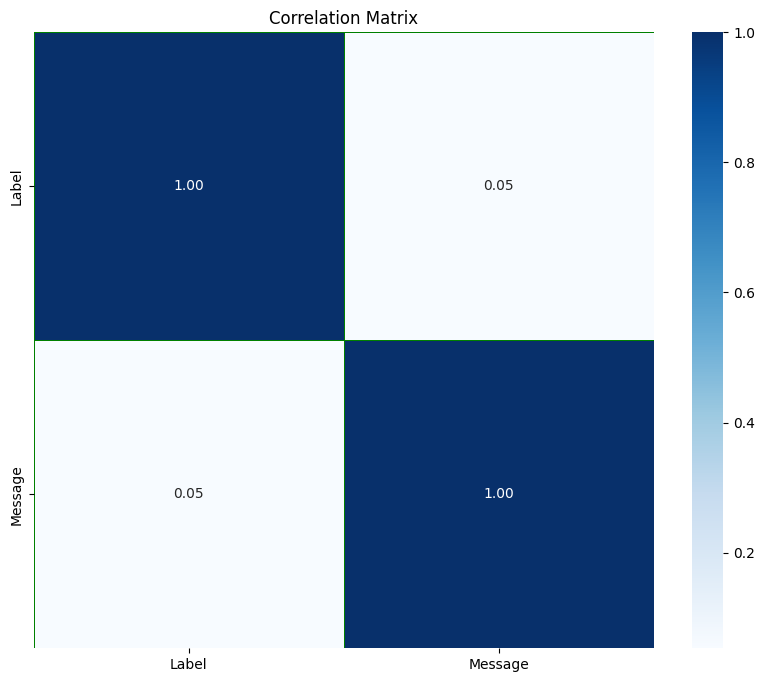

In [32]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5, linecolor='green')
plt.title('Correlation Matrix')
plt.show()

# Data split 

In [16]:
df=Espam_data.copy()
X=df.drop('Label',axis=1).copy()
Y=df['Label'].copy()


# Feature encoding

In [17]:
from sklearn.preprocessing import OrdinalEncoder
ordinal=OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)
ordinal_encode=ordinal.fit(X)
ordinal_encode

OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [18]:
import joblib as jb 
jb.dump(ordinal_encode,'D:/DS NOTE/OASIS INFO BYTE/Email Spam Detection/file/train/model/ordinal_encode_model.pkl')

['D:/DS NOTE/OASIS INFO BYTE/Email Spam Detection/file/train/model/ordinal_encode_model.pkl']

In [19]:
ordinal_encode=ordinal.transform(X)
ordinal_encode_df=pd.DataFrame(ordinal_encode,columns=X.columns)
ordinal_encode_df


,Message
0,1730.0
1,882.0
2,1898.0
3,2501.0
4,1139.0
...,...
2664,105.0
2665,1037.0
2666,1436.0
2667,2015.0


In [20]:
Y=Y.replace({'spam':0,'ham':1})
Y

0       0
1       1
2       1
3       1
4       1
       ..
2780    1
2781    1
2782    1
2783    1
2784    1
Name: Label, Length: 2669, dtype: int64

In [21]:
x_train,x_test,y_train,y_test=train_test_split(ordinal_encode_df,Y,test_size=0.5,random_state=42)

# Model Train

In [22]:
from sklearn.tree import DecisionTreeClassifier
dtc_model=DecisionTreeClassifier()
dtc_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [23]:
print('Train score',dtc_model.score(x_train,y_train)*100)
print('Test score',dtc_model.score(x_test,y_test)*100)

Train score 100.0
Test score 86.51685393258427


In [24]:
jb.dump(dtc_model,'D:/DS NOTE/OASIS INFO BYTE/Email Spam Detection/file/train/model/dtc_model.pkl')

['D:/DS NOTE/OASIS INFO BYTE/Email Spam Detection/file/train/model/dtc_model.pkl']

# Prediction

In [25]:
ordinal_encode_model=jb.load('D:/DS NOTE/OASIS INFO BYTE/Email Spam Detection/file/train/model/ordinal_encode_model.pkl')
model=jb.load('D:/DS NOTE/OASIS INFO BYTE/Email Spam Detection/file/train/model/dtc_model.pkl')

In [26]:
y_pred=pd.DataFrame(model.predict(x_test))
Y_pred=y_pred.replace({0:'spam',1:'ham'})
Y_pred=Y_pred.rename(columns={0: 'label'})
Y_pred

,label
0,ham
1,spam
2,spam
3,ham
4,ham
...,...
1330,ham
1331,ham
1332,ham
1333,ham


In [27]:
3print(classification_report(y_pred,y_test))
cm=confusion_matrix(y_pred,y_test)


              precision    recall  f1-score   support

           0       0.56      0.48      0.52       201
           1       0.91      0.93      0.92      1134

    accuracy                           0.87      1335
   macro avg       0.74      0.71      0.72      1335
weighted avg       0.86      0.87      0.86      1335



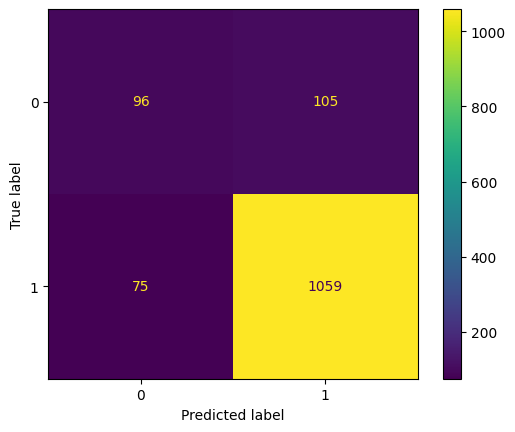

In [28]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Conculsion

**Training Excellence:** The model aced its training with a perfect score of 100%, showcasing its ability to thoroughly understand patterns within known 
data.**Solid Performance:** On new, unseen data (test set), the model maintained a strong accuracy of 86%, indicating reliable performance in identifying
spam emails.**Real-World Utility:** The high accuracy suggests the model can be practically applied to filter out spam in real-world email systems.**Room**
**for Growth:** Acknowledging the potential for further optimization opens the door for ongoing improvement to keep the model effective against evolving 
spam tactics.**Practical Impact:** Exploring the model's application in real-world scenarios emphasizes its relevance and potential contribution to email 
security.